In [2]:
import pandas as pd
df=pd.read_csv("http://bit.ly/tscv17")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df_filtered = df.drop(["Name", "Ticket", 
                       "PassengerId", "Cabin"], 
                      axis=1)

In [8]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [14]:
df_clean = df_filtered.dropna()

In [16]:
df_clean.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [17]:
df_coded = pd.get_dummies(df_clean, 
                columns=["Pclass", "Sex", 
                         "Embarked"])

In [19]:
# need to normalize numerics using some scheme

In [22]:
dFV = df_coded.drop("Survived", axis=1)

In [27]:
from sklearn.decomposition import PCA
pca = PCA(random_state=7414)
pca.fit(dFV)
df_reduced = pca.transform(dFV)
pca_score = pca.explained_variance_ratio_
pca_weights = pca.components_

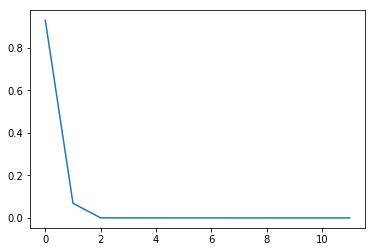

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_ratio_)

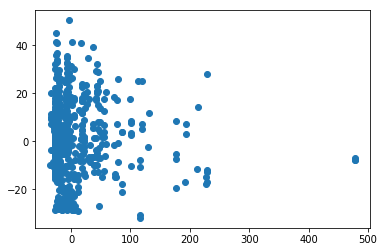

In [32]:
_ = plt.scatter(df_reduced[:,0], df_reduced[:,1])

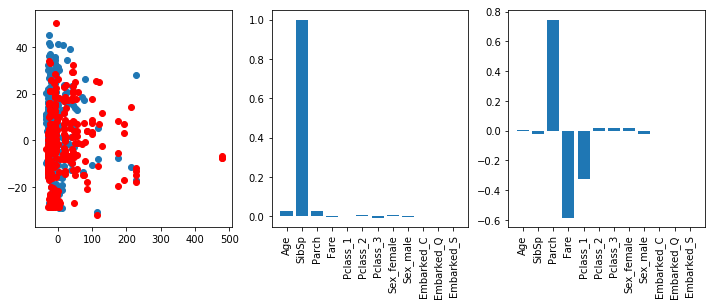

In [46]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12,4))
_=ax2.bar(dFV.columns, pca_weights.T[0])
_ = ax2.set_xticklabels(dFV.columns, rotation=90)
_=ax3.bar(dFV.columns, pca_weights.T[1])
_ = ax3.set_xticklabels(dFV.columns, rotation=90)
_ = ax1.scatter(df_reduced[:,0][df_coded['Survived']==0], 
                df_reduced[:,1][df_coded['Survived']==0])
_ = ax1.scatter(df_reduced[:,0][df_coded['Survived']==1], 
                df_reduced[:,1][df_coded['Survived']==1], color='r')